<a href="https://colab.research.google.com/github/PunamGodugula/Recession_analysis/blob/main/Recession_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
#reading the data
df = pd.read_csv('/content/UK_monthly_gdp.csv')

#reading sample data
df.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


In [3]:
#renaming  columns
df.rename(columns={'Time Period':'time_period',
                   'GDP Growth':'gdp_growth'},
          inplace=True)

In [4]:
#columns in the data
df.columns

Index(['time_period', 'gdp_growth'], dtype='object')

In [5]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_period  36 non-null     object 
 1   gdp_growth   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [6]:
#converting data type of time_period to actual date format
df['time_period'] = pd.to_datetime(df['time_period'], format='/%m/%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time_period  36 non-null     datetime64[ns]
 1   gdp_growth   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
time_period,36,2021-06-16 10:40:00,2020-01-01 00:00:00,2020-09-23 12:00:00,2021-06-16 00:00:00,2022-03-08 18:00:00,2022-12-01 00:00:00,NaN
gdp_growth,36.0,0.072222,-20.9,-0.2,0.3,1.025,9.0,4.392631


In [9]:
#checking for duplicates in data
df.duplicated().sum()

0

### Visualizing GDP Growth Over Time

Text(0.5, 1.0, 'GDP growth over the years')

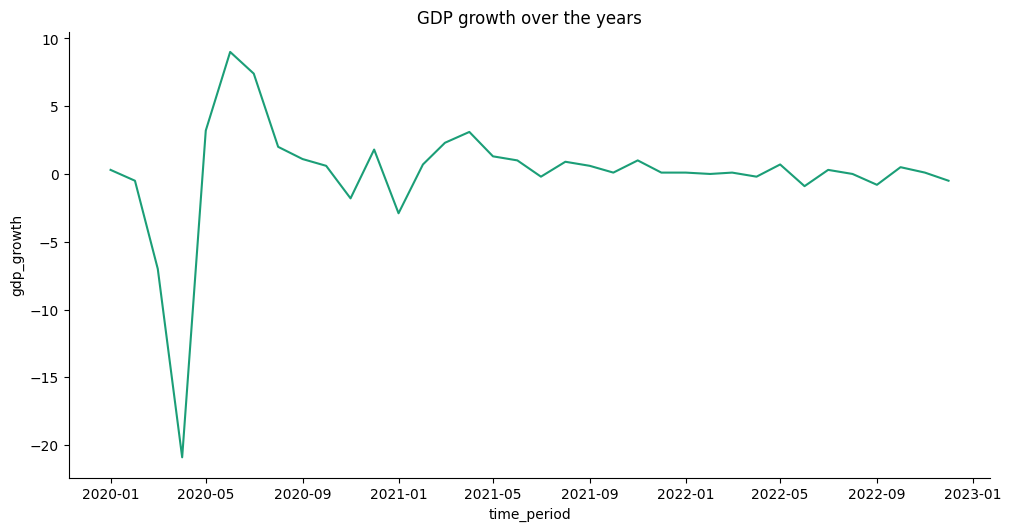

In [10]:
# @title time_period vs gdp_growth

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_period']
  ys = series['gdp_growth']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time_period', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_period')
_ = plt.ylabel('gdp_growth')

plt.title("GDP growth over the years")

### Identifying Recession Periods :

Recession: Monitor the quarterly or annual GDP growth rate. A sustained period of negative GDP growth (usually two consecutive quarters or more) is a strong indicator of a recession. However, a single quarter of negative growth may not necessarily indicate a recession, as it could be due to temporary factors.

Calculating recession:
1. check if current gdp is less than zero
2. check if previous gdp is less than zero
3. compare step-1 and step-2 using '&'
4. store the result in variable


In [11]:
#average GDP value in each quarter over the years
df.set_index('time_period',inplace=True)

#Resampling involves changing the frequency of the time series data, such as upsampling (increasing the frequency) or downsampling (decreasing the frequency).
quarterly_data = df.resample('Q').mean()
print(quarterly_data)

             gdp_growth
time_period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333
2021-06-30     1.800000
2021-09-30     0.433333
2021-12-31     0.400000
2022-03-31     0.066667
2022-06-30    -0.133333
2022-09-30    -0.166667
2022-12-31     0.033333


In [12]:
# Calculate recession based on quarterly GDP growth
quarterly_data['recession'] = ((quarterly_data['gdp_growth'] < 0) & (quarterly_data['gdp_growth'].shift(1) < 0))
quarterly_data

,gdp_growth,recession
time_period,,
2020-03-31,-2.400000,False
2020-06-30,-2.900000,True
2020-09-30,3.500000,False
2020-12-31,0.200000,False
2021-03-31,0.033333,False
2021-06-30,1.800000,False
2021-09-30,0.433333,False
2021-12-31,0.400000,False
2022-03-31,0.066667,False


In [13]:
#Plot the GDP growth and recession data
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index,
                         y=quarterly_data['gdp_growth'],
                         name='GDP Growth',
                         line=dict(color='green', width=2)))

#include rows where the 'recession' column is True.
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['recession']].index,
                         y=quarterly_data[quarterly_data['recession']]['gdp_growth'],
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

OBSERVATION : The green line indicates the overall trend of gdp growth and the red line indicates the recession period.

### Correlation Between GDP Growth and Recession:

In [14]:
# Calculate correlation coefficient
correlation_coefficient = quarterly_data['gdp_growth'].corr(quarterly_data['recession'].astype(int))

# Print correlation coefficient
print("Correlation Coefficient Between GDP Growth and Recession:", correlation_coefficient)

Correlation Coefficient Between GDP Growth and Recession: -0.45383682885733784


OBSERVATION : A correlation coefficient of -0.4538 suggests a moderate negative correlation between GDP growth and recession.  

### Impact of Recessions on GDP growth :



In [15]:
# Calculate average GDP growth rate during recession periods
average_gdp_growth_during_recession = quarterly_data[quarterly_data['recession']]['gdp_growth'].mean()

# Calculate duration of each recession
recession_periods = quarterly_data[quarterly_data['recession']]
recession_durations = recession_periods.index.to_series().diff().dt.days.fillna(0).astype(int)

# Calculate cumulative GDP loss during recessions
cumulative_gdp_loss_during_recession = quarterly_data[quarterly_data['recession']]['gdp_growth'].sum()

# Print results
print("Average GDP Growth Rate During Recession Periods:", average_gdp_growth_during_recession)
print("**"*30)
print()
print("Duration of Each Recession:")
print(recession_durations)
print("**"*30)
print()
print("Cumulative GDP Loss During Recessions:", cumulative_gdp_loss_during_recession)

Average GDP Growth Rate During Recession Periods: -1.5333333333333332
************************************************************

Duration of Each Recession:
time_period
2020-06-30      0
2022-09-30    822
Freq: 9Q-DEC, Name: time_period, dtype: int64
************************************************************

Cumulative GDP Loss During Recessions: -3.0666666666666664


### Severity of a Recession:
 It tells us how significant or intense the economic downturn is during a particular period. A higher severity indicates a more pronounced decline in economic activity, which can have various implications for individuals, businesses, and governments.

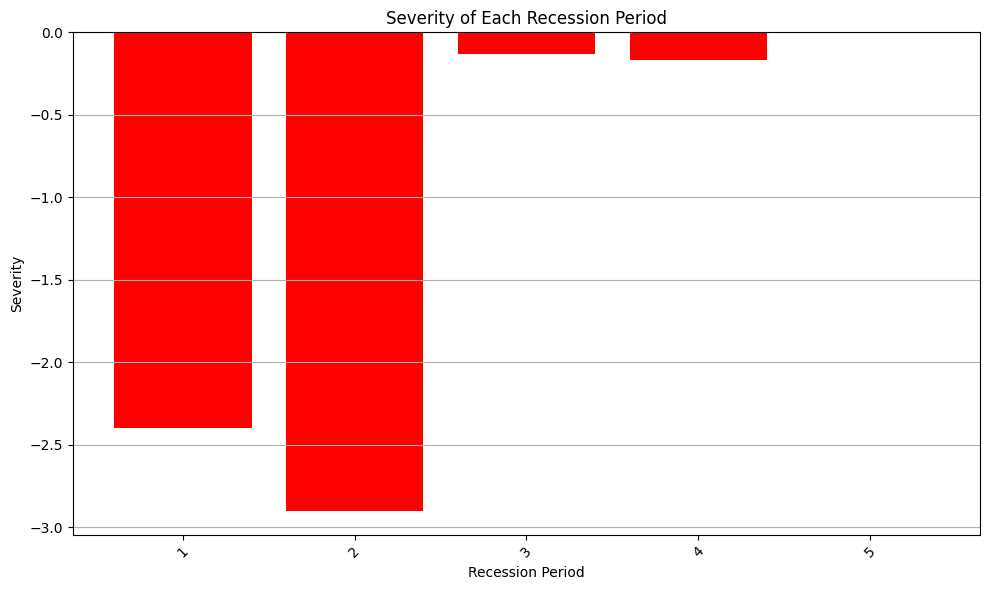

In [87]:
# Identify recession periods and calculate severity
recession_periods = quarterly_data.groupby((quarterly_data['recession'] != quarterly_data['recession'].shift()).cumsum())
recession_severity = recession_periods.apply(lambda x: x['gdp_growth'][x['gdp_growth'] < 0].sum())

# Plot the severity of each recession period
plt.figure(figsize=(10, 6))
plt.bar(recession_severity.index, recession_severity.values, color='red')

# Add labels and title
plt.title('Severity of Each Recession Period')
plt.xlabel('Recession Period')
plt.ylabel('Severity')
plt.grid(axis='y')  # Add gridlines for better visualization

# Show plot
plt.tight_layout()
plt.show()